# Meta Llama 3.1 405B Instruct with v2.26 prompt

This notebook outlines the steps undertook to generate a prediction using Meta Llama 3.1 405B Instruct with prompt from 2/26/25.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from new_pred_utils import predict
from evaluate_predictions import show_metrics

from instructions import llama_instructions_v226
MODEL_ID = "meta.llama3-1-405b-instruct-v1:0"
SYSTEM_PROMPT = llama_instructions_v226

# Load the data

In [2]:
df = pd.read_csv("data/dataset_v1.csv")
len(df)

1084

In [3]:
df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,opinion_types,opinion_sources,cite_names,filename
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,['010combined'],['html_with_citations'],"['7 Wall. 700', 'White', 'Texas']",0001.91306_cites_88061.txt
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,['010combined'],['html_with_citations'],['21 Wall. 138'],0002.91306_cites_88994.txt
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,['010combined'],['html_with_citations'],['2 Wall. 110'],0003.91306_cites_87633.txt
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,['010combined'],['html_with_citations'],"['Texas', 'Hardenberg', '10 Wall. 68']",0004.91306_cites_88240.txt
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,['010combined'],['html_with_citations'],"['Texas', '16 Wall. 402']",0005.91306_cites_88693.txt


# Use the model to generation predictions

In [4]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:SSO Token refresh succeeded
INFO:botocore.tokens:SSO Token refresh succeeded
INFO:botocore.tokens:SSO Token refresh succeeded
INFO:botocore.tokens:SSO Token refresh succeeded
INFO:root:Completed: 1
INFO:root:Completed: 3
INFO:root:Completed: 2
INFO:root:Completed: 0
INFO:root:Completed: 4
INFO:root:Completed: 6
INFO:root:Completed: 7
INFO:root:Completed: 5
INFO:root:Completed: 9
INFO:root:Completed: 8
INFO:root:Completed: 10
INFO:root:Completed: 12
INFO:root:Completed: 13
INFO:root:Completed: 14
INFO:root:Completed: 11
INFO:root:Completed: 16
INFO:root:Completed: 18
INFO:root:Completed: 17
INFO:root:Completed: 15
INFO:root:Completed: 19
INFO:root:Completed: 21
INFO:root:Completed: 23
INFO:root:Completed: 22
INFO:root:Completed: 20
INFO:r

CPU times: user 1min 8s, sys: 6.66 s, total: 1min 15s
Wall time: 42min 24s


[{'0002.91306_cites_88994.txt': {'model': 'meta.llama3-1-405b-instruct-v1:0',
   'input_tokens': 4051,
   'output_tokens': 121,
   'prediction': 'no',
   'confidence': 0.92,
   'rationale': 'The Acting Case discusses and cites the Target Case, but does not explicitly or implicitly overrule it. The court examines the Target Case with particularity, but ultimately uses it as a reference to support its own conclusions, rather than taking any Negative Actions against it.',
   'instructions': 'Determine whether the Acting Case overruled the Target Case.',
   'target_case': 'Vermilye & Co. v. Adams Express Co.',
   'raw_results': '\n\n```json\n{\n  "instructions": "Determine whether the Acting Case overruled the Target Case.",\n  "target_case": "Vermilye & Co. v. Adams Express Co.",\n  "overruled": "no",\n  "confidence": 0.92,\n  "rationale": "The Acting Case discusses and cites the Target Case, but does not explicitly or implicitly overrule it. The court examines the Target Case with partic

In [5]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions 
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,0002.91306_cites_88994.txt,meta.llama3-1-405b-instruct-v1:0,4051,121,no,0.92,The Acting Case discusses and cites the Target...,Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co.,"\n\n```json\n{\n ""instructions"": ""Determine w..."
1,0004.91306_cites_88240.txt,meta.llama3-1-405b-instruct-v1:0,4672,131,yes,0.85,The Acting Case explicitly states that the pos...,Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"\n\n```json\n{\n ""instructions"": ""Determine w..."
2,0003.91306_cites_87633.txt,meta.llama3-1-405b-instruct-v1:0,3128,122,no,0.92,The Acting Case cites and reaffirms the rules ...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"\n\n```json\n{\n ""instructions"": ""Determine w..."
3,0001.91306_cites_88061.txt,meta.llama3-1-405b-instruct-v1:0,5522,120,yes,0.92,The Acting Case explicitly states that certain...,Determine whether the Acting Case overruled th...,Texas v. White,"\n\n```json\n{\n ""instructions"": ""Determine w..."
4,0005.91306_cites_88693.txt,meta.llama3-1-405b-instruct-v1:0,4585,129,no,0.85,The Acting Case discusses and distinguishes th...,Determine whether the Acting Case overruled th...,Huntington v. Texas,"\n\n```json\n{\n ""instructions"": ""Determine w..."


## Save the raw prediction results

In [6]:
prediction_df.to_csv("predictions/2.llama/0.llama31_405B_v226_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [7]:
prediction_df["prediction"].isna().sum()

1

In [8]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
prediction_df = pd.read_csv("predictions/2.llama/0.llama31_405B_v226_prompt.csv")

In [9]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [10]:
assert len(df) == len(prediction_df)

In [11]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,...,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),...,0001.91306_cites_88061.txt,meta.llama3-1-405b-instruct-v1:0,5522,120,yes,0.92,The Acting Case explicitly states that certain...,Determine whether the Acting Case overruled th...,Texas v. White,"\n\n```json\n{\n ""instructions"": ""Determine w..."
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),...,0002.91306_cites_88994.txt,meta.llama3-1-405b-instruct-v1:0,4051,121,no,0.92,The Acting Case discusses and cites the Target...,Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co.,"\n\n```json\n{\n ""instructions"": ""Determine w..."
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),...,0003.91306_cites_87633.txt,meta.llama3-1-405b-instruct-v1:0,3128,122,no,0.92,The Acting Case cites and reaffirms the rules ...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"\n\n```json\n{\n ""instructions"": ""Determine w..."
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),...,0004.91306_cites_88240.txt,meta.llama3-1-405b-instruct-v1:0,4672,131,yes,0.85,The Acting Case explicitly states that the pos...,Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"\n\n```json\n{\n ""instructions"": ""Determine w..."
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),...,0005.91306_cites_88693.txt,meta.llama3-1-405b-instruct-v1:0,4585,129,no,0.85,The Acting Case discusses and distinguishes th...,Determine whether the Acting Case overruled th...,Huntington v. Texas,"\n\n```json\n{\n ""instructions"": ""Determine w..."


# Run evaluation

In [12]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [13]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [14]:
eval_df["prediction"].value_counts()

prediction
no     871
yes    213
Name: count, dtype: int64

In [15]:
eval_df["input_tokens"].sum()

5774470

In [16]:
eval_df["output_tokens"].sum()

153201

In [17]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0})

In [18]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.98      0.91      0.94       935
         Yes       0.62      0.88      0.72       149

    accuracy                           0.91      1084
   macro avg       0.80      0.90      0.83      1084
weighted avg       0.93      0.91      0.91      1084



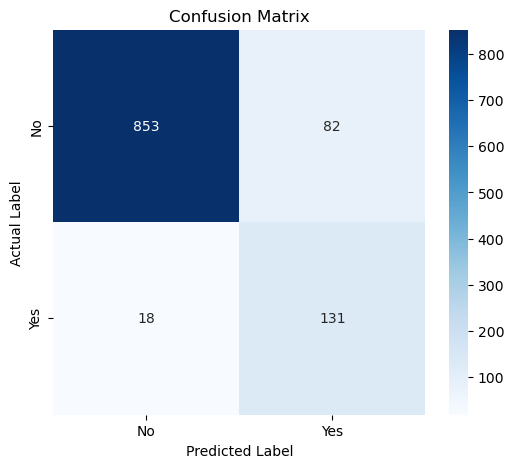

In [19]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [20]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.91
Precision: 0.62
Recall: 0.88
F-score: 0.72
Specificity: 0.91
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 131
True negatives: 853
False positives: 82
False negatives: 18


In [21]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

82

In [22]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

18

# Save the evaluation df

In [23]:
eval_df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,...,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),...,0001.91306_cites_88061.txt,meta.llama3-1-405b-instruct-v1:0,5522,120,yes,0.92,The Acting Case explicitly states that certain...,Determine whether the Acting Case overruled th...,Texas v. White,"\n\n```json\n{\n ""instructions"": ""Determine w..."
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),...,0002.91306_cites_88994.txt,meta.llama3-1-405b-instruct-v1:0,4051,121,no,0.92,The Acting Case discusses and cites the Target...,Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co.,"\n\n```json\n{\n ""instructions"": ""Determine w..."
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),...,0003.91306_cites_87633.txt,meta.llama3-1-405b-instruct-v1:0,3128,122,no,0.92,The Acting Case cites and reaffirms the rules ...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"\n\n```json\n{\n ""instructions"": ""Determine w..."
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),...,0004.91306_cites_88240.txt,meta.llama3-1-405b-instruct-v1:0,4672,131,yes,0.85,The Acting Case explicitly states that the pos...,Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"\n\n```json\n{\n ""instructions"": ""Determine w..."
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),...,0005.91306_cites_88693.txt,meta.llama3-1-405b-instruct-v1:0,4585,129,no,0.85,The Acting Case discusses and distinguishes th...,Determine whether the Acting Case overruled th...,Huntington v. Texas,"\n\n```json\n{\n ""instructions"": ""Determine w..."


In [24]:
eval_df.to_csv("predictions/2.llama/0.llama31_405B_v226_prompt_eval.csv", index=False)